# Spatial Data Processing

Intro paragraph
* deterministic spatial analysis (SG)

* Explain what we mean by dsa
* outline what we will cover below


 airports.csv

## Vignette: Airports

- Querying based on attributes (volume, lon/lat, etc.)

In [435]:
import pandas as pd
import geopandas as gpd
import contextily as ctx
df = pd.read_csv("../data/airports/world-airports.csv")

In [436]:
df.head()

id ident           type  \
0  2434  EGLL  large_airport   
1  3632  KLAX  large_airport   
2  3754  KORD  large_airport   
3  3622  KJFK  large_airport   
4  3384  KATL  large_airport   

                                               name  latitude_deg  \
0                           London Heathrow Airport     51.470600   
1                 Los Angeles International Airport     33.942501   
2              Chicago O'Hare International Airport     41.978600   
3              John F Kennedy International Airport     40.639801   
4  Hartsfield Jackson Atlanta International Airport     33.636700   

   longitude_deg  elevation_ft continent iso_country iso_region municipality  \
0      -0.461941          83.0        EU          GB     GB-ENG       London   
1    -118.407997         125.0       NaN          US      US-CA  Los Angeles   
2     -87.904800         672.0       NaN          US      US-IL      Chicago   
3     -73.778900          13.0       NaN          US      US-NY     New York   
4     -84.428101        1026.0       NaN          US      US-GA      Atlanta   

   scheduled_service gps_code iata_code local_code  \
0                  1     EGLL       LHR        NaN   
1                  1     KLAX       LAX        LAX   
2                  1     KORD       ORD        ORD   
3                  1     KJFK       JFK        JFK   
4                  1     KATL       ATL        ATL   

                                           home_link  \
0                    http://www.heathrowairport.com/   
1                            http://www.iflylax.com/   
2  http://www.flychicago.com/ohare/en/home/Pages/...   
3  http://www.panynj.gov/CommutingTravel/airports...   
4                    http://www.atlanta-airport.com/   

                                      wikipedia_link  \
0  http://en.wikipedia.org/wiki/London_Heathrow_A...   
1  http://en.wikipedia.org/wiki/Los_Angeles_Inter...   
2  http://en.wikipedia.org/wiki/O'Hare_Internatio...   
3  http://en.wikipedia.org/wiki/John_F._Kennedy_I...   
4  http://en.wikipedia.org/wiki/Hartsfield-Jackso...   

                                  keywords    score               last_updated  
0                             LON, Londres  1251675  2016-02-09T10:54:31+00:00  
1                                      NaN  1335475  2010-01-23T11:27:55+00:00  
2                       CHI, Orchard Place  1503175  2014-08-19T18:55:27+00:00  
3  Manhattan, New York City, NYC, Idlewild  1052075  2010-01-23T11:27:54+00:00  
4                                      NaN  2002475  2008-06-13T14:30:04+00:00

Let's use pandas to query for the airports within the `large_airport` class:

In [437]:
df[df.type == 'large_airport']

id    ident           type  \
0        2434     EGLL  large_airport   
1        3632     KLAX  large_airport   
2        3754     KORD  large_airport   
3        3622     KJFK  large_airport   
4        3384     KATL  large_airport   
...       ...      ...            ...   
43270   44093     ZBNY  large_airport   
44663  299738  OM-0003  large_airport   
47391  302303     RKJB  large_airport   
48343   45229      AMC  large_airport   
48768  309298  ID-0017  large_airport   

                                                   name  latitude_deg  \
0                               London Heathrow Airport     51.470600   
1                     Los Angeles International Airport     33.942501   
2                  Chicago O'Hare International Airport     41.978600   
3                  John F Kennedy International Airport     40.639801   
4      Hartsfield Jackson Atlanta International Airport     33.636700   
...                                                 ...           ...   
43270                           Beijing Nanyuan Airport     39.782799   
44663                              Duqm Jaaluni Airport     19.500000   
47391                        Muan International Airport     34.991406   
48343               Mar de Cortés International Airport     31.351621   
48768               Sungai Siring International Airport     -0.373611   

       longitude_deg  elevation_ft continent iso_country iso_region  \
0          -0.461941          83.0        EU          GB     GB-ENG   
1        -118.407997         125.0       NaN          US      US-CA   
2         -87.904800         672.0       NaN          US      US-IL   
3         -73.778900          13.0       NaN          US      US-NY   
4         -84.428101        1026.0       NaN          US      US-GA   
...              ...           ...       ...         ...        ...   
43270     116.388000           NaN        AS          CN      CN-11   
44663      57.642800         380.0        AS          OM      OM-WU   
47391     126.382814          35.0        AS          KR      KR-46   
48343    -113.305864          71.0       NaN          MX     MX-SON   
48768     117.255556          82.0        AS          ID      ID-KI   

         municipality  scheduled_service gps_code iata_code local_code  \
0              London                  1     EGLL       LHR        NaN   
1         Los Angeles                  1     KLAX       LAX        LAX   
2             Chicago                  1     KORD       ORD        ORD   
3            New York                  1     KJFK       JFK        JFK   
4             Atlanta                  1     KATL       ATL        ATL   
...               ...                ...      ...       ...        ...   
43270         Beijing                  1     ZBNY       NAY        NaN   
44663            Duqm                  1     OODQ       JNJ        NaN   
47391            Muan                  1     RKJB       MWX        NaN   
48343  Puerto Peñasco                  1     MMPE       PPE        NaN   
48768       Samarinda                  1      NaN       NaN        NaN   

                                               home_link  \
0                        http://www.heathrowairport.com/   
1                                http://www.iflylax.com/   
2      http://www.flychicago.com/ohare/en/home/Pages/...   
3      http://www.panynj.gov/CommutingTravel/airports...   
4                        http://www.atlanta-airport.com/   
...                                                  ...   
43270                                                NaN   
44663                       http://www.omanairports.com/   
47391            http://muan.airport.co.kr/doc/muan_eng/   
48343                                                NaN   
48768     http://www.proyek.dishubprovkaltim.info/?pro=1   

                                          wikipedia_link  \
0      http://en.wikipedia.org/wiki/London_Heathrow_A...   
1      http://en.wikipedia.org/wiki/Los_Angeles_Inter...  

Since both latitude and longitude are columns in the dataframe we can use pandas to carry out a limited number of geospatial queries. For example, extract all the airports in the northern hemisphere:

In [438]:
df[df.latitude_deg > 0.0]

id    ident           type  \
0        2434     EGLL  large_airport   
1        3632     KLAX  large_airport   
2        3754     KORD  large_airport   
3        3622     KJFK  large_airport   
4        3384     KATL  large_airport   
...       ...      ...            ...   
50626   43708  NL-0013       heliport   
50627  315523  RU-0438  small_airport   
50628  318187  KZ-0081  small_airport   
50629   42246     BITH         closed   
50630  315917  BG-0027  small_airport   

                                                   name  latitude_deg  \
0                               London Heathrow Airport     51.470600   
1                     Los Angeles International Airport     33.942501   
2                  Chicago O'Hare International Airport     41.978600   
3                  John F Kennedy International Airport     40.639801   
4      Hartsfield Jackson Atlanta International Airport     33.636700   
...                                                 ...           ...   
50626          Isala Klinieken. Locatie Sophia Heliport     52.513874   
50627                             Zyryanka West Airport     65.736700   
50628                                   Zubovsk Airport     49.800103   
50629                                  Sauðanes Airport     66.250603   
50630                                           Gabrovo     42.948200   

       longitude_deg  elevation_ft continent iso_country iso_region  \
0          -0.461941          83.0        EU          GB     GB-ENG   
1        -118.407997         125.0       NaN          US      US-CA   
2         -87.904800         672.0       NaN          US      US-IL   
3         -73.778900          13.0       NaN          US      US-NY   
4         -84.428101        1026.0       NaN          US      US-GA   
...              ...           ...       ...         ...        ...   
50626       6.128000           6.0        EU          NL      NL-OV   
50627     150.705000         150.0        EU          RU      RU-SA   
50628      84.214661           NaN        AS          KZ     KZ-VOS   
50629     -15.267200          15.0        EU          IS       IS-6   
50630      25.359980           NaN        EU          BG      BG-07   

      municipality  scheduled_service gps_code iata_code local_code  \
0           London                  1     EGLL       LHR        NaN   
1      Los Angeles                  1     KLAX       LAX        LAX   
2          Chicago                  1     KORD       ORD        ORD   
3         New York                  1     KJFK       JFK        JFK   
4          Atlanta                  1     KATL       ATL        ATL   
...            ...                ...      ...       ...        ...   
50626       Zwolle                  0      NaN       NaN        NaN   
50627     Zyryanka                  0      NaN       NaN        NaN   
50628   Zyryanovsk                  0      NaN       NaN        NaN   
50629     Þórshöfn                  0     BITH       NaN        NaN   
50630      Габрово                  0      NaN       NaN        NaN   

                                               home_link  \
0                        http://www.heathrowairport.com/   
1                                http://www.iflylax.com/   
2      http://www.flychicago.com/ohare/en/home/Pages/...   
3      http://www.panynj.gov/CommutingTravel/airports...   
4                        http://www.atlanta-airport.com/   
...                                                  ...   
50626                                                NaN   
50627                                                NaN   
50628                                                NaN   
50629                                                NaN   
50630                                                NaN   

                                          wikipedia_link  \
0      http://en.wikipedia.org/wiki/London_Heathrow_A...   
1      http://en.wikipedia.org/wiki/Los_Angeles_Inter...   
2      http://en.wikipedia.org/wik

- Subsetting (querying but return dataframe not just indices)

In [439]:
gb = df.groupby('type')

In [440]:
gb.all()

id  ident  name  latitude_deg  longitude_deg  elevation_ft  \
type                                                                           
balloonport     True   True  True          True           True          True   
closed          True   True  True         False          False         False   
heliport        True   True  True          True           True         False   
large_airport   True   True  True         False          False          True   
medium_airport  True   True  True          True          False         False   
seaplane_base   True   True  True          True           True         False   
small_airport   True   True  True          True           True         False   

                continent  iso_country  iso_region  municipality  \
type                                                               
balloonport          True         True        True          True   
closed               True         True        True          True   
heliport             True         True        True          True   
large_airport        True         True        True          True   
medium_airport       True         True        True          True   
seaplane_base        True         True        True          True   
small_airport        True         True        True          True   

                scheduled_service  gps_code  iata_code  local_code  home_link  \
type                                                                            
balloonport                 False      True       True        True       True   
closed                      False      True       True        True       True   
heliport                    False      True       True        True       True   
large_airport               False      True       True        True       True   
medium_airport              False      True       True        True       True   
seaplane_base               False      True       True        True       True   
small_airport               False      True       True        True       True   

                wikipedia_link  keywords  score  last_updated  
type                                                           
balloonport               True      True  False          True  
closed                    True      True  False          True  
heliport                  True      True  False          True  
large_airport             True      True  False          True  
medium_airport            True      True  False          True  
seaplane_base             True      True  False          True  
small_airport             True      True  False          True

In [441]:
small = df[df.type=='small_airport']
medium = df[df.type=='medium_airport']
large = df[df.type=='large_airport']

In [442]:
len(small)

32875

In [443]:
len(medium)

4530

In [444]:
len(large)

574

- spatial join - airports by countries

In [445]:
p = ('../data/airports/ne_10m_admin_0_countries/'\
     'ne_10m_admin_0_countries.shp')
countries_shp = gpd.read_file(p)

- derived features - point sequence to line for the routes
- spatial join - does route pass through a country
- crs: contextily example, 
- knn analysis - find most isolated airport
- voronoi - whats my closest airport
- dissolve - dissovle boundaries in europe

---
## Vignette: Airports (text from point processing)
**TODO: Merge with previous section**

Airports are interesting entities. They are nodes that connect a network of national and international flows, and are its most visible realization. Where they are located is a function of several factors such as the population they are trying to serve, their level of income, the demand for flying, etc. However their exact location is far from the only possible one. Physically speaking, an airport could be built in many more places than where it ends up. This make the process behind an interesting one to explore through the overall "appearance" of their locations; that is, through its pattern.

In this vignette, we will use a preprocessed open dataset. This dataset provides the location of airports in many different countries, alongside an indication of their size and importance to the air transit network. Before we start analyzing it, we need to load it:

In [446]:
# Load GeoJSON file
air = gpd.read_file('../data/airports/airports_clean.geojson')
# Check top of the table
air.head()

scalerank featurecla              type         name abbrev  location  \
0          9    Airport             small     Sahnewal    LUH  terminal   
1          9    Airport               mid      Solapur    SSE  terminal   
2          9    Airport               mid  Birsa Munda    IXR  terminal   
3          9    Airport               mid        Ahwaz    AWZ  terminal   
4          9    Airport  mid and military      Gwalior    GWL  terminal   

  gps_code iata_code                                         wikipedia  \
0     VILD       LUH     http://en.wikipedia.org/wiki/Sahnewal_Airport   
1     VASL       SSE      http://en.wikipedia.org/wiki/Solapur_Airport   
2     VERC       IXR  http://en.wikipedia.org/wiki/Birsa_Munda_Airport   
3     OIAW       AWZ        http://en.wikipedia.org/wiki/Ahwaz_Airport   
4     VIGR       GWL      http://en.wikipedia.org/wiki/Gwalior_Airport   

   natlscale  ... name_ru                      name_sv           name_tr  \
0        8.0  ...    None             Ludhiana Airport              None   
1        8.0  ...    None                         None              None   
2        8.0  ...    None                 M. O. Ranchi              None   
3        8.0  ...    None  Ahwaz International Airport  Ahvaz Havalimanı   
4        8.0  ...    None              Gwalior Airport              None   

               name_vi name_zh wdid_score       ne_id             x  \
0                 None    None          4  1159113785  8.455503e+06   
1                 None    None          4  1159113803  8.452830e+06   
2  Sân bay Birsa Munda      蘭契          4  1159113831  9.498179e+06   
3        Sân bay Ahvaz     阿瓦士          4  1159113845  5.426503e+06   
4      Sân bay Gwalior     瓜廖爾          4  1159113863  8.707101e+06   

              y                         geometry  
0  3.613331e+06  POINT (8455502.604 3613330.733)  
1  1.993750e+06  POINT (8452829.548 1993750.242)  
2  2.670488e+06  POINT (9498179.375 2670487.543)  
3  3.677395e+06  POINT (5426503.078 3677395.464)  
4  3.034483e+06  POINT (8707100.952 3034482.999)  

[5 rows x 38 columns]

At first brush, a point pattern is essentially the collective shape a bunch of points create. Given the table contains the coordinates of each airport in a map projection, the quickest way to get a first sense of what the data look like is to plot the coordinates of airports as points, like a scatterplot:

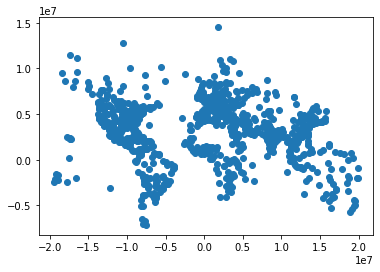

In [447]:
# Plot XY coordinates
import matplotlib.pyplot as plt
plt.scatter(air.x, air.y)

This is not very pretty but that is not our purpose. Our goal was to get a quick first picture and this approach has done the job. Things we can learn from this figure include the fact the overall shape should look familiar to anyone who's seen a map of the world and that, thus, the data do not seem to have any obvious errors. We can then move on to do more interesting things with it.

The first extension is to bring geographic context. Although the shape of the figure above might be familiar, it still takes some effort to identify where different dots are placed on the surface of the Earth. An easy solution to make this easier is to overlay it with a tile map downloaded from the internet. Let us do just that. 

First, we'll download the tiles into an image object, and then we will plot it together with the airports dataset.

In [448]:
# Download tiles for the bounding box of the airport's GeoDataFrame
%time img, ext = ctx.bounds2img(*air.total_bounds, 2)

CPU times: user 31.4 ms, sys: 3.99 ms, total: 35.4 ms
Wall time: 32.7 ms


The method `bounds2img` (from the library `contextily`, `ctx` for short) returns the image object (`img`) and also an auxilliary tuple with its exact geographic bounds:

In [449]:
ext

(-20037508.342789244,
 20037508.342789244,
 -10018754.171394624,
 20037508.342789244)

This allows us then to match it up with other data which is also expressed in the same coordinate reference system (CRS). Let us produce a slightly more useful image than above:

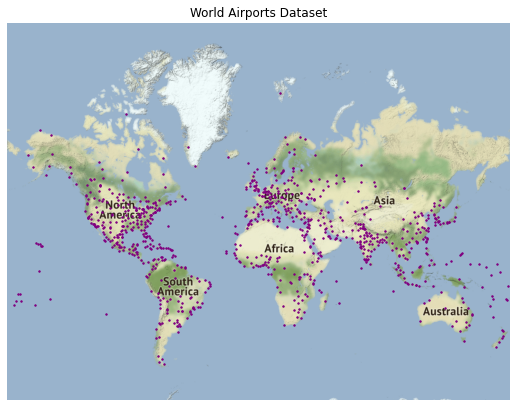

In [450]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title('World Airports Dataset')
# Display
plt.show()

Now this looks a bit better!

### Point-in-polygon visualization

Commonly, we either need or want to link points to areal geographies that allow us to augment their attribute list, or to look at the problem at hand from a new perspective. Maybe because the process we are interested in operates at a more aggregated level, or maybe because by aggregating we can obtain a view into the data that makes it simpler to understand. 

For example, the figure above gives us a good sense about how airports are distributed overall but, in particularly dense areas like Europe, it is hard to see much. By aggregating them to say the country geography, we can consider new sets of questions such as which countries have most airports or which ones have a larger density. This works because the geography we want to aggregate it to, countries, is meaningful. This means it has some inherent structure that confers value. In this case, countries are relevant entities and a crucial piece in arranging the world.

The first thing we need to do to create a country map is to have country (spatial) data. Let us load up a cleaned table with countries:

In [451]:
# Load up shapefile with countries
ctys = gpd.read_file('../data/countries/countries_clean.gpkg')

And, same as with any new dataset, let us have a quick look at what it looks like and how it stacks up with the other data we have collected along the way:

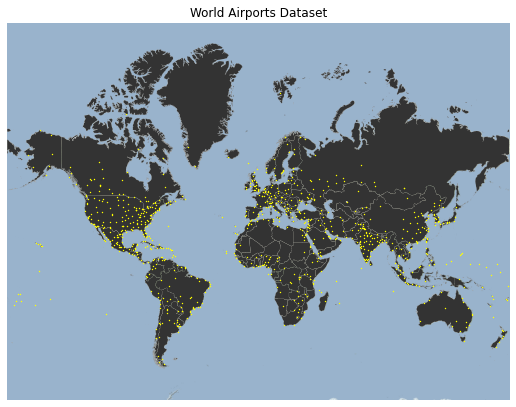

In [452]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Add tile map
ax.imshow(img, extent=ext)
# Display country layer
ctys.plot(ax=ax, linewidth=0.1, \
          edgecolor='0.8', color='0.2')
# Display airport locations
ax.scatter(air.x, air.y, c='yellow', s=2, linewidth=0.)
# Remove axis
ax.set_axis_off()
# Add title
ax.set_title('World Airports Dataset')
# Display
plt.show()

Again nothing new or too exciting from this figure, but this is good news: it means our data are aligned and match up nicely. So we can move on to more interesting ventures.

The next thing that we might want to do to obtain country counts of airports is to link each airport with the country where it is located. Sometimes, we are lucky and the airport table will include a column with that information. In this case, we need to create it for ourselves. This is a well-known problem in geometry and GIS and is commonly known as point-in-polygon: to determine whether a given point is inside a polygon. With that operation solved, linking airports to countries amoutns to a bit of house keeping. We will first explore in pure Python how that algorithm can be easily implemented from scratch so it becomes clear what steps are involved; then we will see a much more efficient and fast implementation that we should probably use when need to perform this operation in other contexts.

---
**NOTE**: skip next if all you want to know is how to perform a standard spatial join

Creating a manual, brute-force implementation of a spatial join is not very difficult, if one has solved the problem of checking whether a point is inside a polygon or not. Thanks to the library that provides geometry objects to `geopandas` (`shapely`), this is solved in Python. For example, we can easily check if the first dot on the airports table is inside the first polygon in the countries table:

In [453]:
# Single out point
pt = air.iloc[0]['geometry']
# Single out polygon
poly = ctys.iloc[0]['geometry']
# Check whether `poly` contains `pt`
poly.contains(pt)

False

That easy. As we can see, the method `contains` in any `shapely` geometry makes it trivial. So, the first airport in the list is not in the first country of the list.

To find which country every airport is in easily (albeit not very efficiently!), we need to sift through all possible combinations to see if any of them gives us a match. Once we find it for a given airport, we need to record that and move on, no need to keep checking. That is exactly what we do in the cell below:

In [454]:
%%time
# Set up an empty dictionary to populate it with the matches
airport2country = {aID: None for aID in air.index}
# Loop over every airport
for aID, row_a in air.iterrows():
    # Single out location of the airport for convenience
    pt = row_a['geometry']
    # Loop over every country
    for cID, row_p in ctys.iterrows():
        # Single out country polygon for convenience
        poly = row_p['geometry']
        # Single out country name for convenience
        cty_nm = row_p['ADMIN']
        # Check if the country contains the airport
        if poly.contains(pt):
            # If so, store in the dictionary
            airport2country[aID] = cty_nm
            # Move on to the next airport, skipping remaining 
            # countries (an airport cannot be in two countries 
            # at the same time)
            break
airport2country = pd.Series(airport2country)

CPU times: user 32.8 s, sys: 28.9 ms, total: 32.8 s
Wall time: 32.9 s


Once run, we can check the content of the dictionary we have created (after converting it to a `Series` for convenience):

In [455]:
pd.DataFrame({'Airport Name': air['name'], 'Country': airport2country}).head(10)

Airport Name Country
0                     Sahnewal   India
1                      Solapur   India
2                  Birsa Munda   India
3                        Ahwaz    Iran
4                      Gwalior   India
5               Hodeidah Int'l   Yemen
6  Devi Ahilyabai Holkar Int'l   India
7                  Gandhinagar   India
8             Chandigarh Int'l   India
9                   Aurangabad   India

---

Although interesting from a pedagogical standpoint, in practive, very rarely do we have to write a spatial join algorithm from scratch. More commonly, we will use one of the already available packaged methods. As mentioned, this is a fairly standard GIS operation, and the GIS community has spent a lot of effort to build optimized algorithms that can conveniently do the job for us. In `GeoPandas`, this is as simple as calling `sjoin`:

In [456]:
# Spatial join
%time air_w_cty = gpd.sjoin(air, ctys)
air_w_cty.head()

CPU times: user 373 ms, sys: 3.8 ms, total: 376 ms
Wall time: 376 ms


scalerank featurecla              type                         name abbrev  \
0          9    Airport             small                     Sahnewal    LUH   
1          9    Airport               mid                      Solapur    SSE   
2          9    Airport               mid                  Birsa Munda    IXR   
4          9    Airport  mid and military                      Gwalior    GWL   
6          9    Airport               mid  Devi Ahilyabai Holkar Int'l    IDR   

   location gps_code iata_code  \
0  terminal     VILD       LUH   
1  terminal     VASL       SSE   
2  terminal     VERC       IXR   
4  terminal     VIGR       GWL   
6  terminal     VAID       IDR   

                                           wikipedia  natlscale  ... name_tr  \
0      http://en.wikipedia.org/wiki/Sahnewal_Airport        8.0  ...    None   
1       http://en.wikipedia.org/wiki/Solapur_Airport        8.0  ...    None   
2   http://en.wikipedia.org/wiki/Birsa_Munda_Airport        8.0  ...    None   
4       http://en.wikipedia.org/wiki/Gwalior_Airport        8.0  ...    None   
6  http://en.wikipedia.org/wiki/Devi_Ahilyabai_Ho...        8.0  ...    None   

                                 name_vi name_zh wdid_score       ne_id  \
0                                   None    None          4  1159113785   
1                                   None    None          4  1159113803   
2                    Sân bay Birsa Munda      蘭契          4  1159113831   
4                        Sân bay Gwalior     瓜廖爾          4  1159113863   
6  Sân bay quốc tế Devi Ahilyabai Holkar     印多爾          4  1159113903   

              x             y                         geometry index_right  \
0  8.455503e+06  3.613331e+06  POINT (8455502.604 3613330.733)           6   
1  8.452830e+06  1.993750e+06  POINT (8452829.548 1993750.242)           6   
2  9.498179e+06  2.670488e+06  POINT (9498179.375 2670487.543)           6   
4  8.707101e+06  3.034483e+06  POINT (8707100.952 3034482.999)           6   
6  8.439052e+06  2.599128e+06  POINT (8439051.727 2599127.542)           6   

   ADMIN  
0  India  
1  India  
2  India  
4  India  
6  India  

[5 rows x 40 columns]

Instead of the $\approx$47 seconds it took our homemade algorithm, the one above did a full join in just over two seconds! Through this join also, it is not only the IDs that are matched, but the entire table. Let us quickly compare whether the names match up with our own:

In [457]:
# Display only top six records of airport and country name
# Note that the order of the `sjoin`ed table is not the same
# as ours but it can easily be rearranged using original indices
air_w_cty.loc[range(6), ['name', 'ADMIN']]

name  ADMIN
0        Sahnewal  India
1         Solapur  India
2     Birsa Munda  India
3           Ahwaz   Iran
4         Gwalior  India
5  Hodeidah Int'l  Yemen

Voila! Both tables seem to match nicely.

To finish this vignette, let us explore which countries have the most airports through a simple choropleth. The only additional step we need to take is to obtain counts per country. But this is pretty straightforward now we have them linked to each airport. To do this, we use the `groupby` operation which, well, groups by a given column in a table, and then we apply the method `size`, which tells us how many elements every group has:

In [458]:
# Group airports by country and count by group
cty_counts = air_w_cty.groupby('ADMIN')\
                      .size()

Then a choropleth is as simple as:

/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:237: UserWarning: Warning: Not enough unique values in array to form k classes
  "Warning: Not enough unique values in array to form k classes", UserWarning
/opt/conda/lib/python3.7/site-packages/mapclassify/classifiers.py:239: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


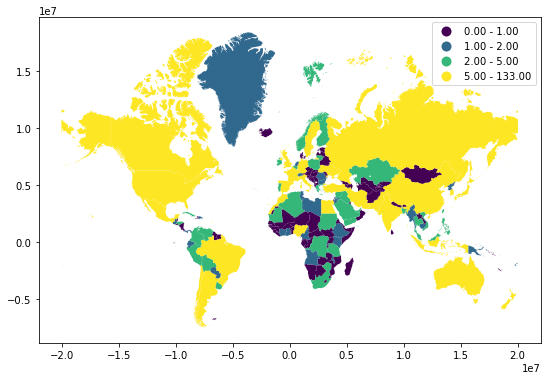

In [459]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Index countries by the name, append the airport counts
# (which are themselves indexed on country names too),
# Fill any missing value in the count with zero (no counts
# in this context means zero airports), and display choropleth
# using quantiles
p = ctys.set_index('ADMIN')\
        .assign(airport_count=cty_counts)\
        .fillna(0)\
        .plot(column='airport_count', scheme='Quantiles', \
              ax=ax, linewidth=0, legend=True)
# Display map
plt.show()

Maybe unsurprisingly, what we find after all of this is that larger countries such as Canada, US, or Russia, have more airports. However, we can also find interesting insights. Some countries with similar size, such as France or Germany and some African countries such as Namibia have very different numbers. This should trigger further questions as to why that is, and maybe even suggest some tentative answers.

And additional view that might be of interest is to display airport counts, but weighted by the area of the country. In other words, to show airport density. The idea behind it is to explore the variation in probabilities of an airport to be located in a given country, irrespective of how large that country is. Let us first create the densities:

In [460]:
# Airport density
# Note since the CRS we are working with is expressed in Sq. metres,
# we rescale it so the numbers are easier to read
airport_density = cty_counts * 1e12 / ctys.set_index('ADMIN').area

airport_density.head()

ADMIN
Afghanistan     1.069522
Albania        19.990270
Algeria         0.999154
Angola          1.519744
Argentina       3.009511
dtype: float64

And now we are ready to plot!

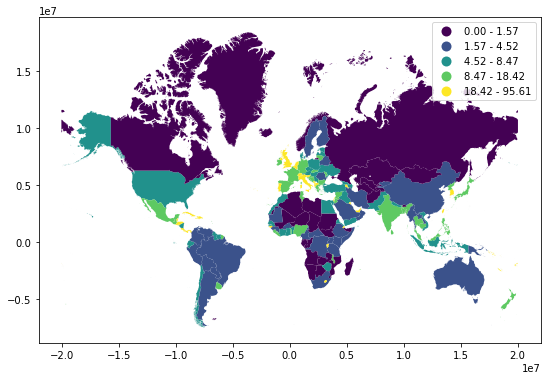

In [461]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(9, 9))
# Index countries by the name, append the airport densities
# (which are themselves indexed on country names too),
# Fill any missing value in the count with zero (no number
# in this context means zero airports), and display choropleth
# using quantiles
p = ctys.set_index('ADMIN')\
        .assign(airport_dens=airport_density)\
        .fillna(0)\
        .plot(column='airport_dens', scheme='Quantiles', \
              ax=ax, linewidth=0, legend=True)
# Display map
plt.show()

This map gives us a very different view. Very large countries are all of a sudden "penalized" and some smaller ones rise to the highest values. Again, how to read this map and whether its message is interesting or not depends on what we are after. But, together with the previous one, it does highlight important issues to consider when exploring uneven spatial data and what it means to display data (e.g. airports) through specific geographies (e.g. countries).

--- 

## Vignette: House Prices

- keyword table join (census)
(keyword comes from spatial join with polygon shown below)

- groupby: avg house price by census polygon
- buffer: deriving dummies for houses within x of an amenity
- spatial join: create keyword that we use for the table
- raster/clip with shape: elevation or pollution by tract, or by house, or  noise
- voronoi - what's my closest coffee shop

- Sets: union, intersection, difference: point out that these are really implied by the buffer used to define regimes (intersection dummy = 1, difference dummy=0)

message is, if you have the column in the table use it, but many cases you do not have the column and need to go the spatial join route

In [462]:
df = pd.read_csv('../data/sandiego/listings.csv')
len(df)


6608

In [463]:
from shapely.geometry import Point

In [464]:
geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]

In [465]:
import geopandas as gpd

In [466]:
gdf = gpd.GeoDataFrame(df)

In [467]:
gdf['geometry'] = geometry

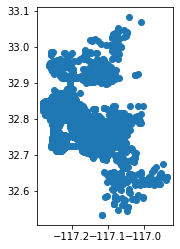

In [468]:
gdf.plot()

In [469]:
crs = {'init': 'epsg:4326'}
gdf.crs = crs

/opt/conda/lib/python3.7/site-packages/pyproj/crs/crs.py:55: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [470]:
tracts = '../data/sandiego/tl_2019_06_tract.shp'
tracts = gpd.read_file(tracts)

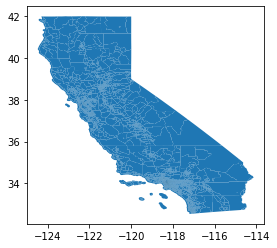

In [471]:
tracts.plot()

In [472]:
sd_tracts = tracts[tracts.COUNTYFP=='073']

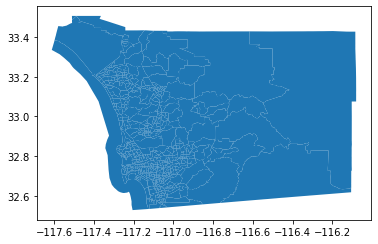

In [473]:
sd_tracts.plot()

In [474]:
# remove coastal tract

In [475]:
bounds = sd_tracts.bounds

In [476]:
bounds

minx       miny        maxx       maxy
45   -117.135084  32.679042 -117.110843  32.692832
46   -117.133881  32.701148 -117.120347  32.706743
47   -117.133839  32.690933 -117.120621  32.701219
48   -117.133881  32.705342 -117.118839  32.711779
49   -117.142488  32.711572 -117.117738  32.719045
...          ...        ...         ...        ...
7725 -117.093128  33.118125 -117.076424  33.135183
7726 -117.184116  32.739662 -117.167287  32.750412
7727 -117.084945  32.718046 -117.054329  32.738717
7730 -117.095186  32.690258 -117.085000  32.704133
7790 -116.971064  32.838324 -116.946931  32.863555

[628 rows x 4 columns]

In [477]:
bounds.minx.min()

-117.611081

In [478]:
bounds[bounds.minx==bounds.minx.min()]

minx       miny        maxx       maxy
1352 -117.611081  32.528832 -117.126103  33.384377

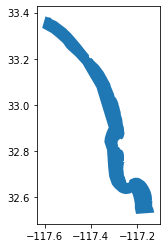

In [479]:
sd_tracts[bounds.minx==bounds.minx.min()].plot()

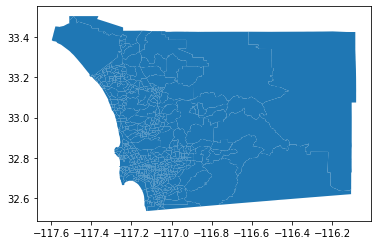

In [480]:
sd_tracts[bounds.minx!=bounds.minx.min()].plot()

In [481]:
sd_tracts = sd_tracts[bounds.minx!=bounds.minx.min()]

In [482]:
 gdf.geometry

0        POINT (-117.001940369833 32.58188167801647)
1       POINT (-116.9768121144805 32.65302888381333)
2       POINT (-116.9718134566892 32.66147659114107)
3       POINT (-116.9512517429438 32.63869423281108)
4       POINT (-116.9388907899006 32.63894228779517)
                            ...                     
6603    POINT (-117.2628332040951 32.94902455263553)
6604    POINT (-117.2536279127883 32.98593739160699)
6605    POINT (-117.2571230300871 32.97952173614116)
6606    POINT (-117.2595746167958 32.98509766672782)
6607    POINT (-117.2587191901285 32.98044057055955)
Name: geometry, Length: 6608, dtype: object

In [483]:
j = gpd.sjoin(gdf, sd_tracts, how='inner', op='within')

/opt/conda/lib/python3.7/site-packages/geopandas/tools/sjoin.py:61: UserWarning: CRS of frames being joined does not match!(+init=epsg:4326 +type=crs != epsg:4269)
  "(%s != %s)" % (left_df.crs, right_df.crs)


In [484]:
gdf = gdf.to_crs(sd_tracts.crs)

In [485]:
j = gpd.sjoin(gdf, sd_tracts, how='inner', op='within')

In [486]:
j.shape

(6604, 109)

In [487]:
j.groupby(by='GEOID').count()

id  listing_url  scrape_id  last_scraped  name  summary  space  \
GEOID                                                                         
06073000100  32           32         32            32    32       27     22   
06073000201  16           16         16            16    16       16     13   
06073000202  56           56         56            56    56       51     43   
06073000300  71           71         71            71    71       68     55   
06073000400  43           43         43            43    43       42     23   
...          ..          ...        ...           ...   ...      ...    ...   
06073020710   1            1          1             1     1        1      1   
06073021303   2            2          2             2     2        2      1   
06073021400  40           40         40            40    40       40     28   
06073021500  23           23         23            23    23       23     14   
06073021900   2            2          2             2     2        2      0   

             description  experiences_offered  neighborhood_overview  ...  \
GEOID                                                                 ...   
06073000100           32                   32                     17  ...   
06073000201           16                   16                     11  ...   
06073000202           56                   56                     36  ...   
06073000300           71                   71                     49  ...   
06073000400           43                   43                     23  ...   
...                  ...                  ...                    ...  ...   
06073020710            1                    1                      1  ...   
06073021303            2                    2                      1  ...   
06073021400           40                   40                     24  ...   
06073021500           23                   23                     11  ...   
06073021900            2                    2                      0  ...   

             COUNTYFP  TRACTCE  NAME  NAMELSAD  MTFCC  FUNCSTAT  ALAND  \
GEOID                                                                    
06073000100        32       32    32        32     32        32     32   
06073000201        16       16    16        16     16        16     16   
06073000202        56       56    56        56     56        56     56   
06073000300        71       71    71        71     71        71     71   
06073000400        43       43    43        43     43        43     43   
...               ...      ...   ...       ...    ...       ...    ...   
06073020710         1        1     1         1      1         1      1   
06073021303         2        2     2         2      2         2      2   
06073021400        40       40    40        40     40        40     40   
06073021500        23       23    23        23     23        23     23   
06073021900         2        2     2         2      2         2      2   

             AWATER  INTPTLAT  INTPTLON  
GEOID                                    
06073000100      32        32        32  
06073000201      16        16        16  
06073000202      56        56        56  
06073000300      71        71        71  
06073000400      43        43        43  
...             ...       ...       ...  
06073020710       1         1         1  
06073021303       2         2         2  
06073021400      40        40        40  
06073021500      23        23        23  
06073021900       2         2         2  

[304 rows x 108 columns]

In [488]:
j[['price', 'GEOID']]

price        GEOID
0      $49.00  06073010014
3235  $499.00  06073010014
3240   $55.00  06073010014
3423   $49.00  06073010014
3715   $45.00  06073010014
...       ...          ...
6582   $77.00  06073003204
6588   $40.00  06073013411
6590  $275.00  06073009902
6595  $150.00  06073020706
6604   $75.00  06073017306

[6604 rows x 2 columns]

In [489]:
j['price'] = j['price'].apply(lambda x: x.replace('$', '').replace(',', '')).astype(float)

In [490]:
j[['price','GEOID']].groupby(by='GEOID').mean()

price
GEOID                  
06073000100  300.000000
06073000201  157.000000
06073000202  190.000000
06073000300  141.154930
06073000400  131.093023
...                 ...
06073020710  175.000000
06073021303  222.500000
06073021400  330.425000
06073021500  358.869565
06073021900  106.000000

[304 rows x 1 columns]

In [491]:
tract_mean = j[['price','GEOID']].groupby(by='GEOID').mean()

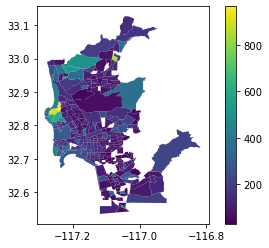

In [492]:
sd_tracts.merge(tract_mean, on='GEOID').plot(column='price',legend=True)

In [493]:
sd_tracts = sd_tracts.merge(tract_mean, on='GEOID')

In [494]:
west, south, east, north = sd_tracts.total_bounds

In [495]:
%time img, ext = ctx.bounds2img(west, south, east, north, ll=True, zoom=11)

CPU times: user 15.4 ms, sys: 0 ns, total: 15.4 ms
Wall time: 14.7 ms


In [496]:
sd_tracts = sd_tracts.to_crs(epsg=3857)

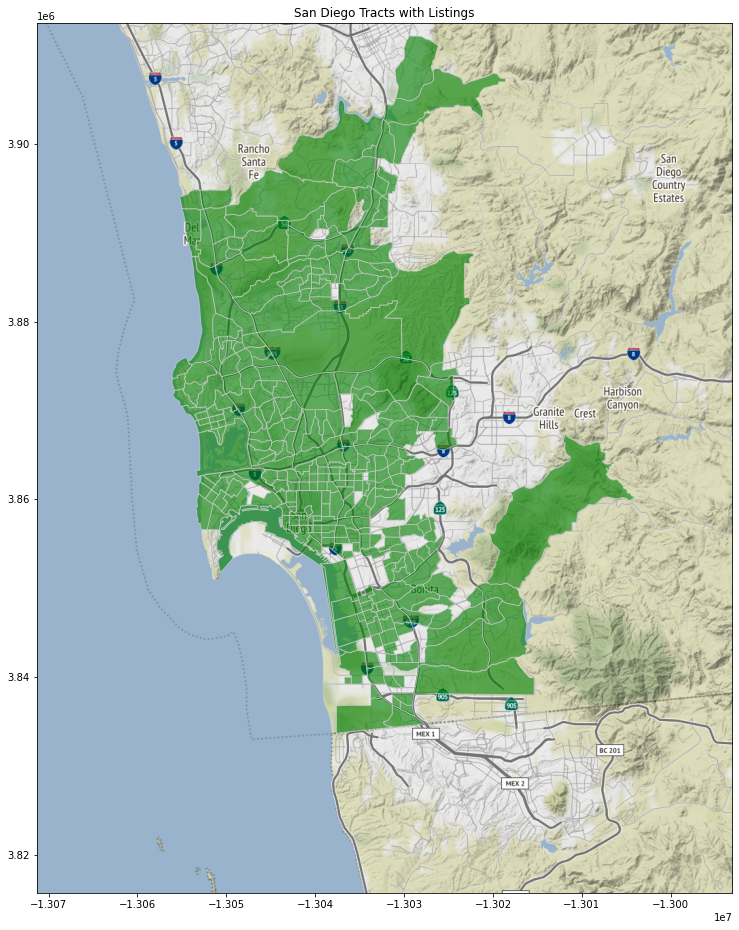

In [497]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16, 16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
sd_tracts.plot(ax=ax, alpha=0.6, color='green',edgecolor='lightgrey')
#listings.plot(ax=ax, c='green')
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Tracts with Listings')
# Display
plt.show()


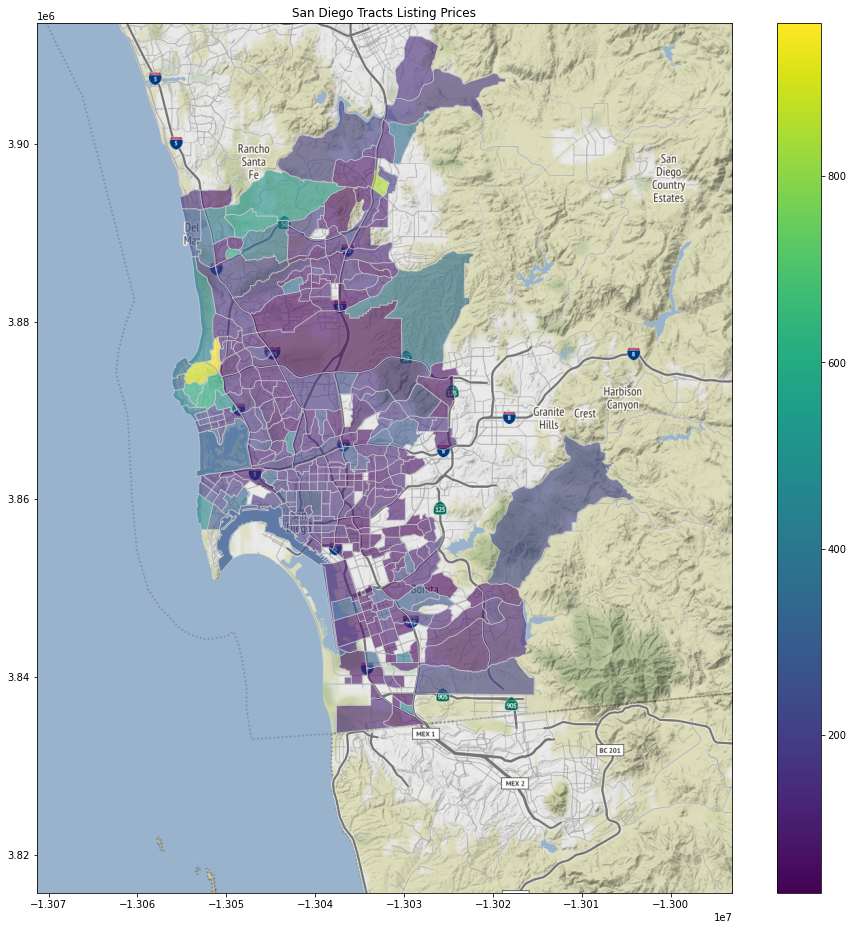

In [498]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16, 16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
sd_tracts.plot(ax=ax, alpha=0.6, edgecolor='lightgrey',
              column='price', legend=True)
#listings.plot(ax=ax, c='green')
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Tracts Listing Prices')
# Display
plt.show()


## Cafes

In [499]:
cafes = gpd.read_file('../data/sandiego/sdcafes.gpkg')

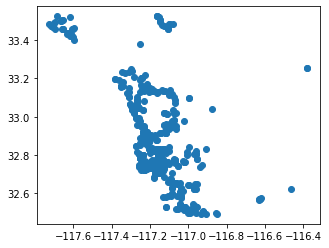

In [500]:
cafes.plot()

In [501]:
cafes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [502]:
west, south, east, north = cafes.total_bounds

In [503]:
%time img, ext = ctx.bounds2img(west, south, east, north, ll=True, zoom=11)

CPU times: user 44 ms, sys: 16 ms, total: 60 ms
Wall time: 59.7 ms


In [504]:
ext

(-13110479.091473429,
 -12953936.057545388,
 3815736.451995998,
 3972279.4859240386)

In [505]:
cafes.total_bounds

array([-117.7242807,   32.4931876, -116.3801025,   33.5246217])

In [506]:
cafes = cafes.to_crs(epsg=3857)

In [507]:
listings = j.to_crs(epsg=3857)

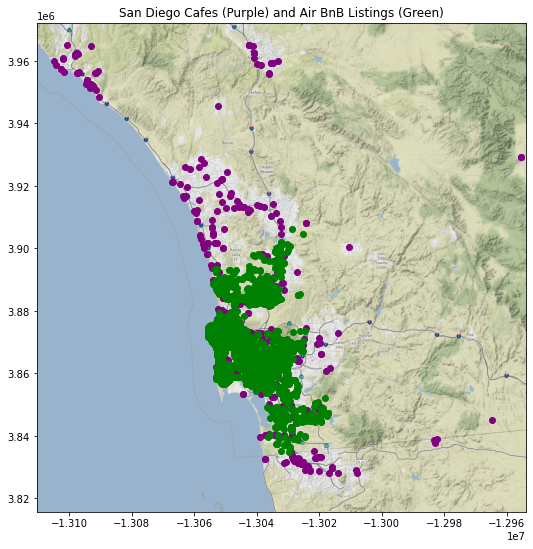

In [508]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
cafes.plot(ax=ax, c='purple')
listings.plot(ax=ax, c='green')
#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafes (Purple) and Air BnB Listings (Green)')
# Display
plt.show()


In [509]:
listings.total_bounds

array([-13055680.15029134,   3834819.47070506, -13017117.03636635,
         3906340.27819217])

In [510]:
%time img, ext = ctx.bounds2img(*listings.total_bounds, zoom=11)

CPU times: user 169 ms, sys: 101 µs, total: 169 ms
Wall time: 167 ms


In [511]:
w,s,e,n = listings.total_bounds

In [512]:
cafes = cafes.cx[w:e,s:n]

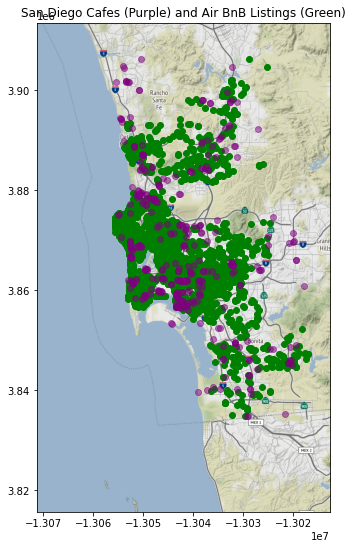

In [513]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
listings.plot(ax=ax, c='green')
cafes.plot(ax=ax, c='purple', alpha=0.5)

#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafes (Purple) and Air BnB Listings (Green)')

# Display
plt.show()


In [514]:
import libpysal

In [515]:
sheds, generators = libpysal.cg.voronoi.voronoi_frames(list(zip(cafes.geometry.x.values, cafes.geometry.y.values)))

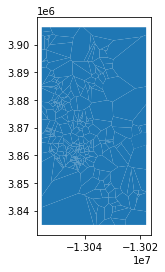

In [516]:
sheds.plot()

In [517]:
sheds.crs = 'epsg:3857'

In [518]:
w,s,e,n = sheds.total_bounds

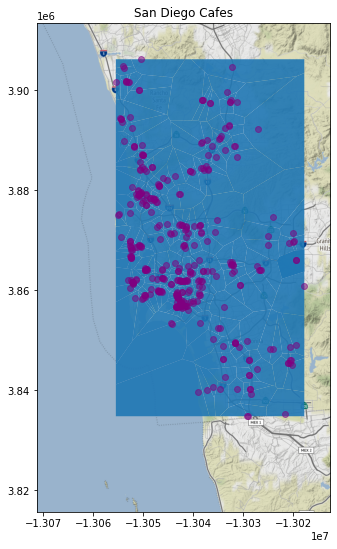

In [519]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, alpha=.9)
cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafes')
# Display
#ax.set_xlim(w,e)
#ax.set_ylim(s,n)
plt.show()


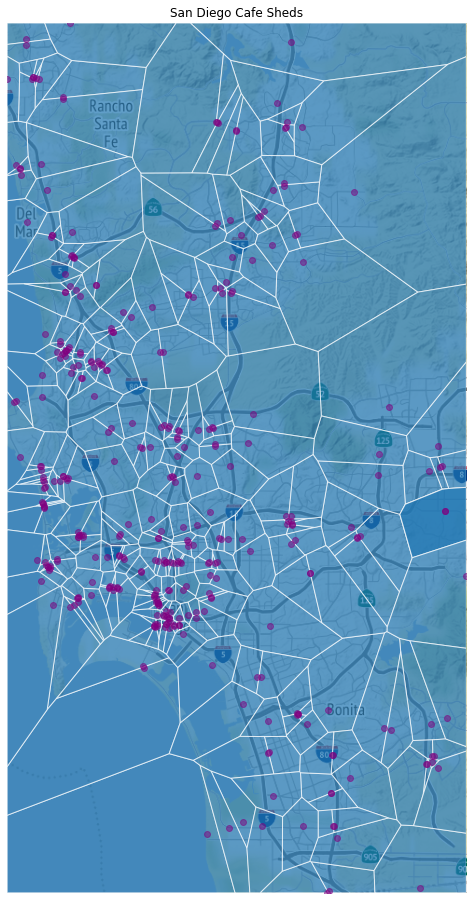

In [520]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, alpha=.7, edgecolor='white')
cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


In [521]:
ext

(-13071343.332991421,
 -13012639.695268406,
 3815736.451995998,
 3913575.8482010225)

In [522]:
w

-13055489.73431425

In [523]:
e

-13017804.201630497

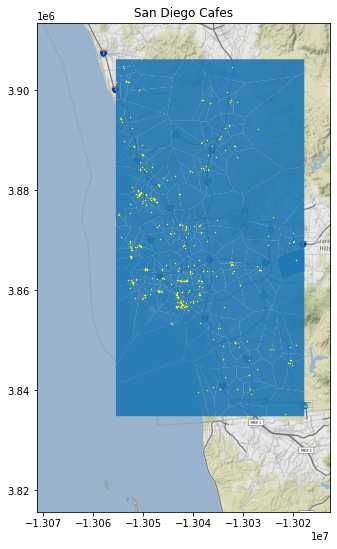

In [524]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, alpha=.9)
ax.scatter(cafes.geometry.x, cafes.geometry.y, c='yellow', s=2, linewidth=0.)
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafes')
# Display
plt.show()


In [525]:
sheds.crs = 'epsg:3857'

### Closest cafe

In [526]:
cc = gpd.sjoin(listings.drop(['index_right'], axis=1), sheds, how='inner', op='within')

In [527]:
cc.head()

id                            listing_url       scrape_id  \
0     11204286  https://www.airbnb.com/rooms/11204286  20160706203047   
3235   3673552   https://www.airbnb.com/rooms/3673552  20160706203047   
3240  13802262  https://www.airbnb.com/rooms/13802262  20160706203047   
3423  10855070  https://www.airbnb.com/rooms/10855070  20160706203047   
3715  13812990  https://www.airbnb.com/rooms/13812990  20160706203047   

     last_scraped                                               name  \
0      2016-07-07                    Family friendly/California king   
3235   2016-07-07                New, Luxury,Suburban w/Ocean Views!   
3240   2016-07-07                           Cozy Room with Queen Bed   
3423   2016-07-07                        2 beds (full/twin) 2 guests   
3715   2016-07-07  Quiet home, Qbed, bathroom, wifi, laundry, coffee   

                                                summary  \
0     Aquatica Waterpark, Sleep train Amphitheater, ...   
3235  Quiet family neighborhood. Your new luxurious ...   
3240  My place is close to I-805 Freeway, Shopping C...   
3423  Aquatica Waterpark, Sleep train Amphitheater, ...   
3715  My place is to 20 mins from SAN  2.5 to intl b...   

                                                  space  \
0     Walking to Aquatica Waterpark, Sleep train Amp...   
3235  The home has five regular beds plus 5 air beds...   
3240                     The TV is a 55" Smart Samsung.   
3423  Walking to Aquatica Waterpark, Sleep train Amp...   
3715  1 exit from Sea World Water Park (water slides...   

                                            description experiences_offered  \
0     Aquatica Waterpark, Sleep train Amphitheater, ...                none   
3235  Quiet family neighborhood. Your new luxurious ...                none   
3240  My place is close to I-805 Freeway, Shopping C...                none   
3423  Aquatica Waterpark, Sleep train Amphitheater, ...                none   
3715  My place is to 20 mins from SAN  2.5 to intl b...                none   

                                  neighborhood_overview  ...        GEOID  \
0                                                   NaN  ...  06073010014   
3235  Quiet and peaceful neighborhood.  Owner not pr...  ...  06073010014   
3240                                                NaN  ...  06073010014   
3423                                Clean and quiet,,,,  ...  06073010014   
3715                                                NaN  ...  06073010014   

        NAME             NAMELSAD  MTFCC FUNCSTAT     ALAND AWATER  \
0     100.14  Census Tract 100.14  G5020        S  28491550  19560   
3235  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3240  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3423  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3715  100.14  Census Tract 100.14  G5020        S  28491550  19560   

         INTPTLAT      INTPTLON  index_right  
0     +32.5744390  -116.9790546          232  
3235  +32.5744390  -116.9790546          232  
3240  +32.5744390  -116.9790546          232  
3423  +32.5744390  -116.9790546          232  
3715  +32.5744390  -116.9790546          232  

[5 rows x 109 columns]

In [528]:
cc.shape

(6546, 109)

In [529]:
cc.rename(columns={'index_right': 'cafe'}, inplace=True)

In [530]:
cc.head()

id                            listing_url       scrape_id  \
0     11204286  https://www.airbnb.com/rooms/11204286  20160706203047   
3235   3673552   https://www.airbnb.com/rooms/3673552  20160706203047   
3240  13802262  https://www.airbnb.com/rooms/13802262  20160706203047   
3423  10855070  https://www.airbnb.com/rooms/10855070  20160706203047   
3715  13812990  https://www.airbnb.com/rooms/13812990  20160706203047   

     last_scraped                                               name  \
0      2016-07-07                    Family friendly/California king   
3235   2016-07-07                New, Luxury,Suburban w/Ocean Views!   
3240   2016-07-07                           Cozy Room with Queen Bed   
3423   2016-07-07                        2 beds (full/twin) 2 guests   
3715   2016-07-07  Quiet home, Qbed, bathroom, wifi, laundry, coffee   

                                                summary  \
0     Aquatica Waterpark, Sleep train Amphitheater, ...   
3235  Quiet family neighborhood. Your new luxurious ...   
3240  My place is close to I-805 Freeway, Shopping C...   
3423  Aquatica Waterpark, Sleep train Amphitheater, ...   
3715  My place is to 20 mins from SAN  2.5 to intl b...   

                                                  space  \
0     Walking to Aquatica Waterpark, Sleep train Amp...   
3235  The home has five regular beds plus 5 air beds...   
3240                     The TV is a 55" Smart Samsung.   
3423  Walking to Aquatica Waterpark, Sleep train Amp...   
3715  1 exit from Sea World Water Park (water slides...   

                                            description experiences_offered  \
0     Aquatica Waterpark, Sleep train Amphitheater, ...                none   
3235  Quiet family neighborhood. Your new luxurious ...                none   
3240  My place is close to I-805 Freeway, Shopping C...                none   
3423  Aquatica Waterpark, Sleep train Amphitheater, ...                none   
3715  My place is to 20 mins from SAN  2.5 to intl b...                none   

                                  neighborhood_overview  ...        GEOID  \
0                                                   NaN  ...  06073010014   
3235  Quiet and peaceful neighborhood.  Owner not pr...  ...  06073010014   
3240                                                NaN  ...  06073010014   
3423                                Clean and quiet,,,,  ...  06073010014   
3715                                                NaN  ...  06073010014   

        NAME             NAMELSAD  MTFCC FUNCSTAT     ALAND AWATER  \
0     100.14  Census Tract 100.14  G5020        S  28491550  19560   
3235  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3240  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3423  100.14  Census Tract 100.14  G5020        S  28491550  19560   
3715  100.14  Census Tract 100.14  G5020        S  28491550  19560   

         INTPTLAT      INTPTLON  cafe  
0     +32.5744390  -116.9790546   232  
3235  +32.5744390  -116.9790546   232  
3240  +32.5744390  -116.9790546   232  
3423  +32.5744390  -116.9790546   232  
3715  +32.5744390  -116.9790546   232  

[5 rows x 109 columns]

## Choropleth of Demand  in Coffee Shed

In [531]:
cc.groupby(by='cafe').count()

id  listing_url  scrape_id  last_scraped  name  summary  space  \
cafe                                                                   
0     21           21         21            21    21       21     13   
1     27           27         27            27    27       27     21   
2      3            3          3             3     3        3      1   
3     37           37         37            37    37       37     15   
4     19           19         19            19    19       18     11   
...   ..          ...        ...           ...   ...      ...    ...   
360   11           11         11            11    11        9     10   
361    5            5          5             5     5        5      4   
362    1            1          1             1     1        1      1   
364    3            3          3             3     3        3      3   
366    9            9          9             9     9        9      6   

      description  experiences_offered  neighborhood_overview  ...  TRACTCE  \
cafe                                                           ...            
0              21                   21                     10  ...       21   
1              27                   27                     21  ...       27   
2               3                    3                      3  ...        3   
3              37                   37                     12  ...       37   
4              19                   19                      8  ...       19   
...           ...                  ...                    ...  ...      ...   
360            11                   11                      7  ...       11   
361             5                    5                      5  ...        5   
362             1                    1                      1  ...        1   
364             3                    3                      2  ...        3   
366             9                    9                      3  ...        9   

      GEOID  NAME  NAMELSAD  MTFCC  FUNCSTAT  ALAND  AWATER  INTPTLAT  \
cafe                                                                    
0        21    21        21     21        21     21      21        21   
1        27    27        27     27        27     27      27        27   
2         3     3         3      3         3      3       3         3   
3        37    37        37     37        37     37      37        37   
4        19    19        19     19        19     19      19        19   
...     ...   ...       ...    ...       ...    ...     ...       ...   
360      11    11        11     11        11     11      11        11   
361       5     5         5      5         5      5       5         5   
362       1     1         1      1         1      1       1         1   
364       3     3         3      3         3      3       3         3   
366       9     9         9      9         9      9       9         9   

      INTPTLON  
cafe            
0           21  
1           27  
2            3  
3           37  
4           19  
...        ...  
360         11  
361          5  
362          1  
364          3  
366          9  

[276 rows x 108 columns]

In [532]:
cc.cafe

0       232
3235    232
3240    232
3423    232
3715    232
       ... 
6556    321
6570    130
6606    130
6581    193
6587    193
Name: cafe, Length: 6546, dtype: int64

In [533]:
generators.iloc[cc.cafe.unique()] # cafes that are a nearest neighbor to at least 1 listing

geometry
232  POINT (-13028434.979 3839331.659)
318  POINT (-13028698.528 3840314.949)
216  POINT (-13020680.964 3848687.233)
328  POINT (-13019367.584 3849164.792)
352  POINT (-13020163.663 3845126.034)
..                                 ...
22   POINT (-13047802.600 3878161.045)
67   POINT (-13048585.911 3878437.513)
321  POINT (-13037246.585 3840155.818)
130  POINT (-13054351.147 3893738.293)
193  POINT (-13036128.715 3850347.887)

[276 rows x 1 columns]

In [534]:
import mapclassify

In [535]:
mapclassify.__version__

'2.2.0'

In [536]:
demand = cc[['cafe', 'listing_url']].groupby(by='cafe').count()
demand.rename(columns={'listing_url':'listings'}, inplace=True)

In [537]:
demand.head()

listings
cafe          
0           21
1           27
2            3
3           37
4           19

In [538]:
demand.shape

(276, 1)

In [539]:
demand.index

Int64Index([  0,   1,   2,   3,   4,   6,   7,   8,  13,  14,
            ...
            354, 355, 356, 357, 359, 360, 361, 362, 364, 366],
           dtype='int64', name='cafe', length=276)

In [540]:
sheds = sheds.join(demand)

In [541]:
sheds.head()

geometry  listings
0  POLYGON ((-13049695.945 3875815.899, -13050508...      21.0
1  POLYGON ((-13048191.158 3876826.119, -13048188...      27.0
2  POLYGON ((-13050692.385 3878267.634, -13050124...       3.0
3  POLYGON ((-13042826.751 3857229.641, -13042658...      37.0
4  POLYGON ((-13036115.986 3900203.927, -13036277...      19.0

In [542]:
sheds

geometry  listings
0    POLYGON ((-13049695.945 3875815.899, -13050508...      21.0
1    POLYGON ((-13048191.158 3876826.119, -13048188...      27.0
2    POLYGON ((-13050692.385 3878267.634, -13050124...       3.0
3    POLYGON ((-13042826.751 3857229.641, -13042658...      37.0
4    POLYGON ((-13036115.986 3900203.927, -13036277...      19.0
..                                                 ...       ...
362  POLYGON ((-13037514.309 3884465.763, -13038221...       1.0
363  POLYGON ((-13041556.234 3872539.497, -13040704...       NaN
364  POLYGON ((-13041723.889 3871370.945, -13042556...       3.0
365  POLYGON ((-13038791.183 3872999.004, -13039460...       NaN
366  POLYGON ((-13040704.934 3874328.852, -13040720...       9.0

[367 rows x 2 columns]

In [543]:
sheds = sheds.fillna(0)

In [544]:
sheds

geometry  listings
0    POLYGON ((-13049695.945 3875815.899, -13050508...      21.0
1    POLYGON ((-13048191.158 3876826.119, -13048188...      27.0
2    POLYGON ((-13050692.385 3878267.634, -13050124...       3.0
3    POLYGON ((-13042826.751 3857229.641, -13042658...      37.0
4    POLYGON ((-13036115.986 3900203.927, -13036277...      19.0
..                                                 ...       ...
362  POLYGON ((-13037514.309 3884465.763, -13038221...       1.0
363  POLYGON ((-13041556.234 3872539.497, -13040704...       0.0
364  POLYGON ((-13041723.889 3871370.945, -13042556...       3.0
365  POLYGON ((-13038791.183 3872999.004, -13039460...       0.0
366  POLYGON ((-13040704.934 3874328.852, -13040720...       9.0

[367 rows x 2 columns]

In [545]:
cafes.shape

(367, 95)

In [546]:
cafes['sheds'] = sheds.geometry

In [547]:
cafes.columns

Index(['full_id', 'osm_id', 'osm_type', 'amenity', 'cuisine', 'name',
       'addr_city', 'addr_count', 'addr_cou_1', 'addr_house', 'addr_postc',
       'addr_state', 'addr_stree', 'phone', 'brand', 'brand_wiki',
       'brand_wi_1', 'official_n', 'takeaway', 'outdoor_se', 'opening_ho',
       'wheelchair', 'wheelcha_1', 'level', 'internet_a', 'url', 'website',
       'wifi', 'descriptio', 'addr_hou_1', 'internet_1', 'internet_2',
       'laptop fri', 'shop', 'source_add', 'fax', 'smoking', 'facebook',
       'source_ref', 'motorcar', 'name_en', 'entrance', 'cost_coffe',
       'drive_thro', 'addr_unit', 'addr_door', 'atm', 'building', 'addr_floor',
       'alt_name', 'barrier', 'addr_suite', 'contact_em', 'payment_bi',
       'emergency', 'diet_vegan', 'email', 'operator', 'opening__1',
       'air_condit', 'bar', 'name_es', 'addr_place', 'payment_vi', 'door',
       'name_zh', 'toilets', 'toilets_ac', 'craft', 'diet_veget', 'payment_am',
       'payment_ca', 'payment_cr', 'payment_di

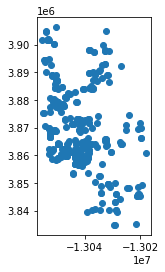

In [548]:
cafes.plot()

In [549]:
cafes.set_geometry('sheds', inplace=True)

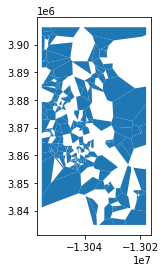

In [550]:
cafes.plot()

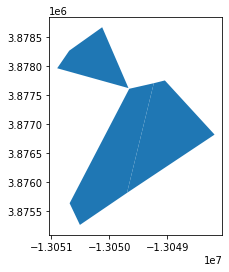

In [551]:
cafes.iloc[0:3].plot()

In [552]:
cafes.set_geometry('geometry', inplace=True)

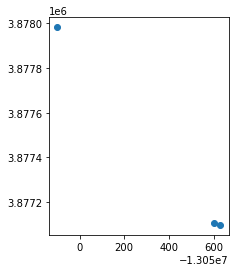

In [553]:
cafes.iloc[0:3].plot()

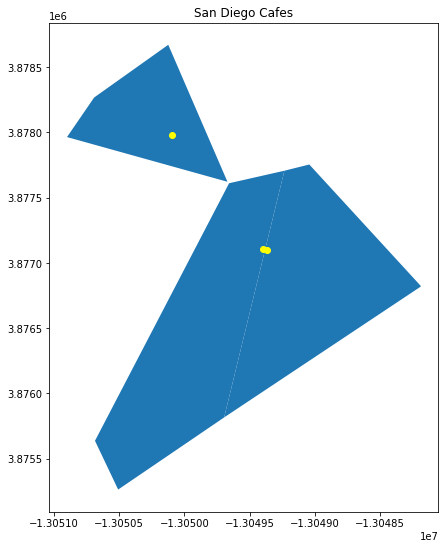

In [554]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(9, 9))
# Display tile map
#ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
cafes.set_geometry('sheds', inplace=True)
cafes.iloc[0:3].plot(ax=ax)
cafes.set_geometry( 'geometry', inplace=True)
cafes.iloc[0:3].plot(ax=ax,c='yellow')

#sheds.plot(ax=ax, alpha=.9)
#ax.scatter(cafes.geometry.x, cafes.geometry.y, c='yellow', s=2, linewidth=0.)
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafes')
# Display
plt.show()


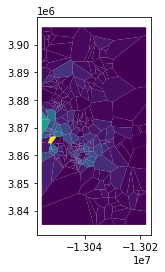

In [555]:
sheds.plot(column='listings')

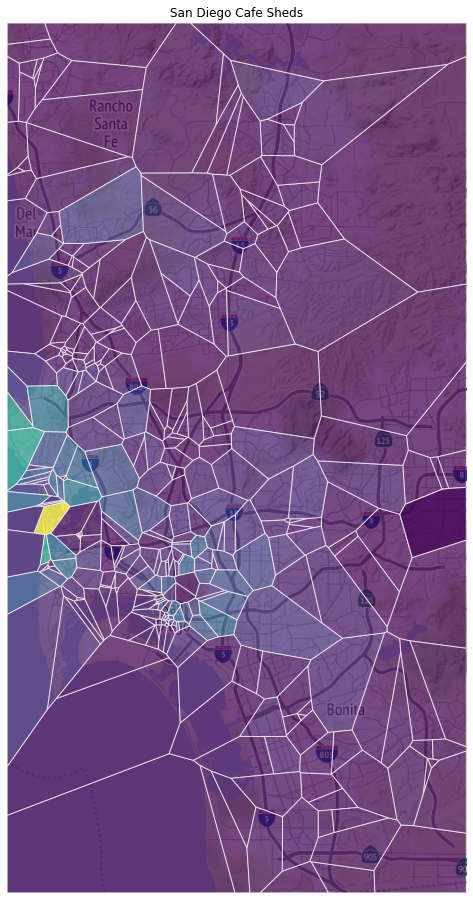

In [556]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, alpha=.7, edgecolor='white', column='listings')
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


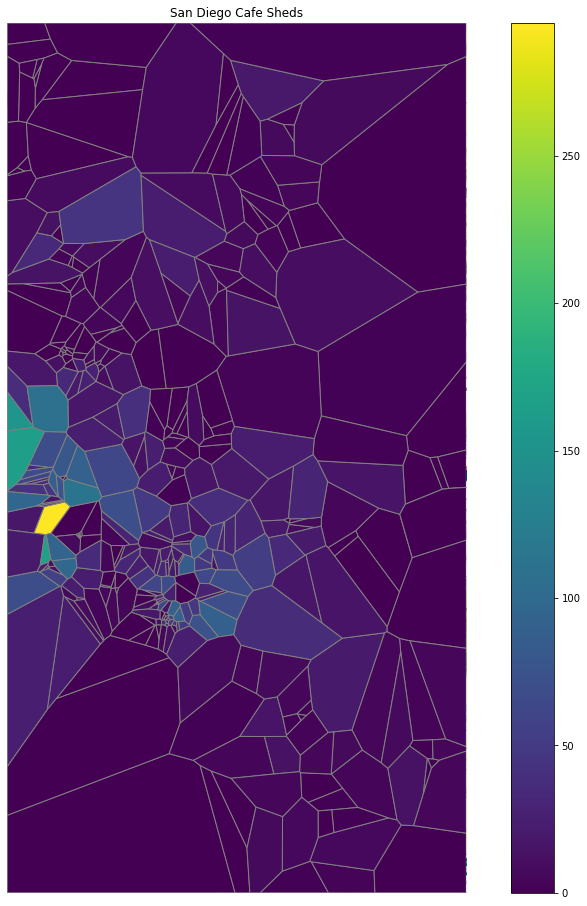

In [557]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='listings', legend=True)
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


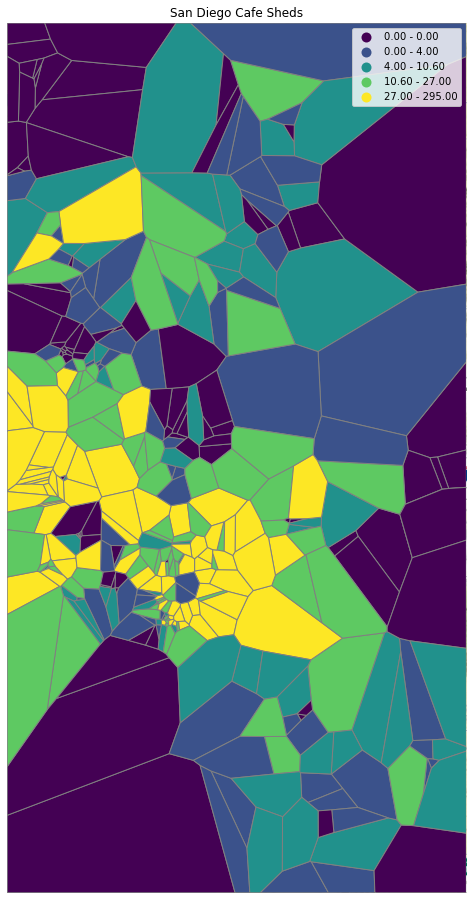

In [558]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='listings', legend=True,
          scheme='quantiles')
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


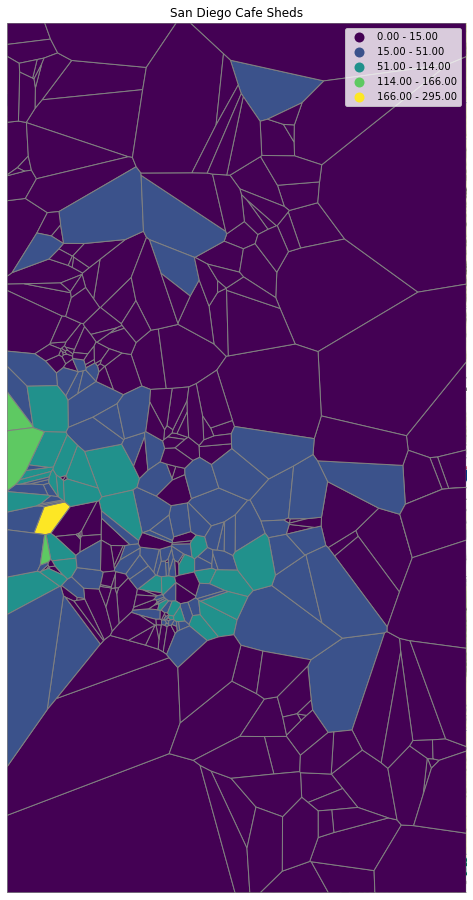

In [559]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='listings', legend=True,
          scheme='fisher_jenks')
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


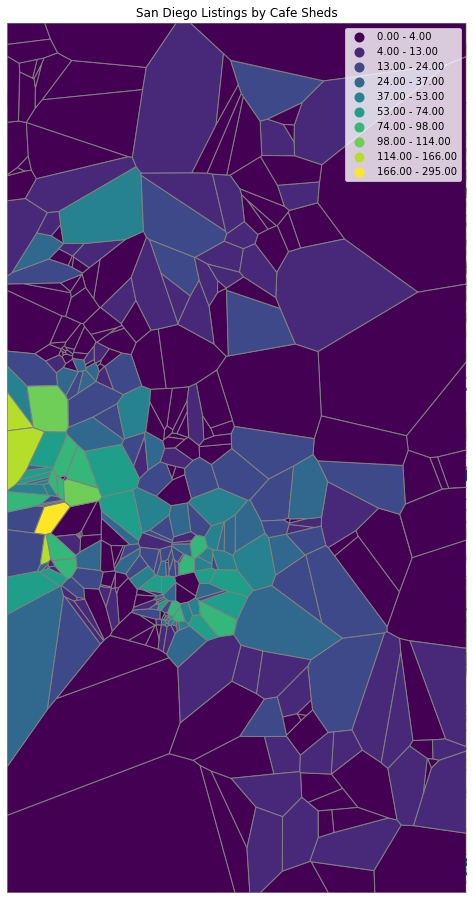

In [560]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='listings', legend=True,
          scheme='fisher_jenks',
          classification_kwds={'k':10})
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Listings by Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


## Exercises

1. Which coffeeshed has the highest listing price?

2. How distant are the highest and lowest listings?
3. Generate a choropleth that expresses listing intensity (listings per square kilometer) by coffeeshed.

In [561]:
sheds.geometry

0      POLYGON ((-13049695.945 3875815.899, -13050508...
1      POLYGON ((-13048191.158 3876826.119, -13048188...
2      POLYGON ((-13050692.385 3878267.634, -13050124...
3      POLYGON ((-13042826.751 3857229.641, -13042658...
4      POLYGON ((-13036115.986 3900203.927, -13036277...
                             ...                        
362    POLYGON ((-13037514.309 3884465.763, -13038221...
363    POLYGON ((-13041556.234 3872539.497, -13040704...
364    POLYGON ((-13041723.889 3871370.945, -13042556...
365    POLYGON ((-13038791.183 3872999.004, -13039460...
366    POLYGON ((-13040704.934 3874328.852, -13040720...
Name: geometry, Length: 367, dtype: geometry

In [562]:
sheds.geometry.area

0      1.464090e+06
1      1.304878e+06
2      6.117556e+05
3      1.440897e+05
4      2.017431e+07
           ...     
362    3.447711e+05
363    1.005681e+06
364    1.110123e+06
365    8.447524e+06
366    5.057231e+06
Length: 367, dtype: float64

In [563]:
sheds['area'] = sheds.geometry.area / 1000000

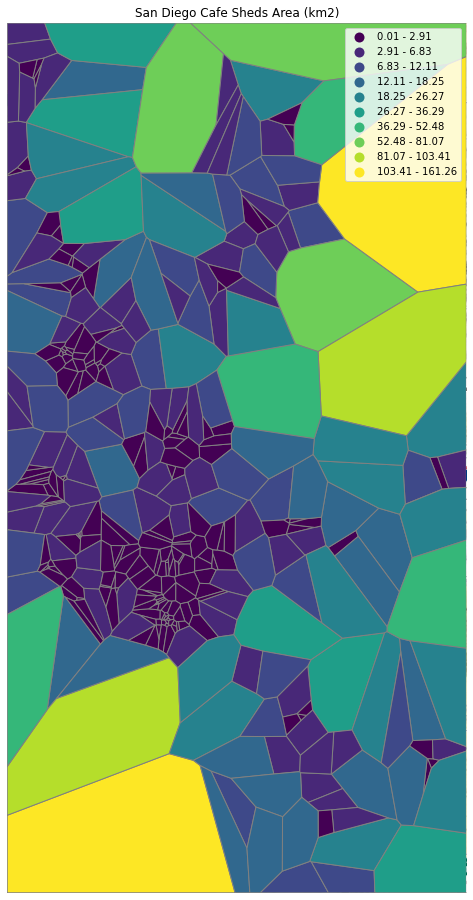

In [564]:
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='area', legend=True,
          scheme='fisher_jenks',
          classification_kwds={'k':10})
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Cafe Sheds Area (km2)')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


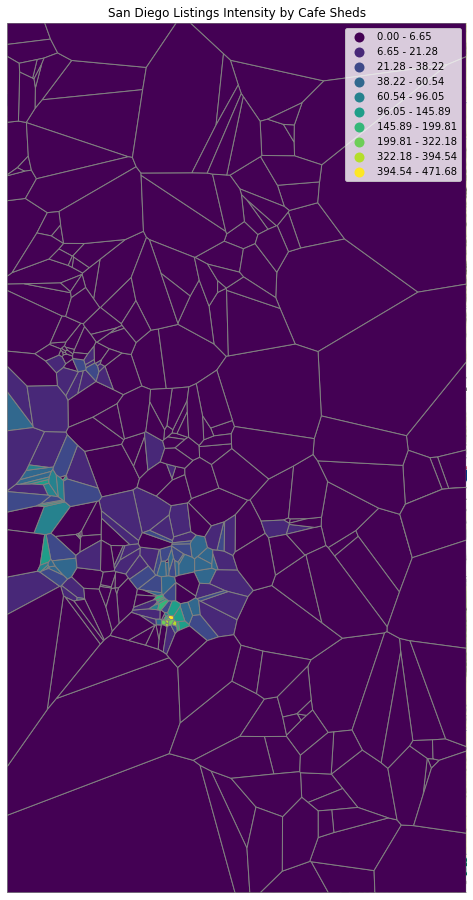

In [565]:
sheds['lintensity'] = sheds['listings'] / sheds['area']
# Set up figure and axes
f, ax = plt.subplots(1, figsize=(16,16))
# Display tile map
ax.imshow(img, extent=ext)
# Display airports on top
#listings.plot(ax=ax, c='green')
sheds.plot(ax=ax, edgecolor='grey', column='lintensity', legend=True,
          scheme='fisher_jenks',
          classification_kwds={'k':10})
#cafes.plot(ax=ax, c='purple', alpha=0.5)
#listings.plot(ax=ax, c='green')


#ax.scatter(air.x, air.y, c='purple', s=2)
# Remove axis
#ax.set_axis_off()
# Add title
ax.set_title('San Diego Listings Intensity by Cafe Sheds')
# Display
ax.set_xlim((w,e))
ax.set_ylim((s,n))
ax.set_axis_off()

plt.show()


---

<a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-nd/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-nd/4.0/">Creative Commons Attribution-NonCommercial-NoDerivatives 4.0 International License</a>.